In [56]:
import numpy as np
import pandas as pd
import kmapper as km
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams

In [57]:
df = pd.read_csv('var3.csv', sep=';')
df['class'] = df['class'].apply(lambda x : int(x))
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x : float(x.replace(',','.')))
df

,class,x.1,x.2,x.3,x.4
0,1,3.577601,-2.051512,1.701332,1.148827
1,1,2.868127,-2.394688,-0.799705,1.254679
2,1,2.144910,-2.500147,1.510637,0.036819
3,1,1.958493,-4.788681,-0.500953,-0.988635
4,1,3.135924,-2.243192,1.436652,1.722733
...,...,...,...,...,...
145,3,1.243742,-0.971538,2.023415,0.518566
146,3,0.045010,-2.192344,-0.790980,-1.167181
147,3,-0.174569,-2.342386,1.858956,-1.122681
148,3,1.341474,-1.456174,3.039204,0.182093


In [58]:
test_indexes = np.random.randint(low=0, high=150, size=15)
df_test = df.iloc[test_indexes].copy()
df.drop(index=test_indexes, inplace=True)
df.index = range(len(df))
df_test.index = range(len(df_test))

In [59]:
df.describe()

,class,x.1,x.2,x.3,x.4
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2.000000,2.218122,-1.297567,-0.024453,0.879427
std,0.807373,1.429928,1.669415,1.811389,1.258551
min,1.000000,-1.302628,-4.884090,-4.193395,-1.859755
25%,1.000000,1.263491,-2.591538,-1.359991,-0.092070
50%,2.000000,2.259400,-1.411475,-0.193664,0.822665
75%,3.000000,3.153921,0.069405,1.402611,1.652729
max,3.000000,5.697729,2.056789,3.600501,4.398886


<AxesSubplot:>

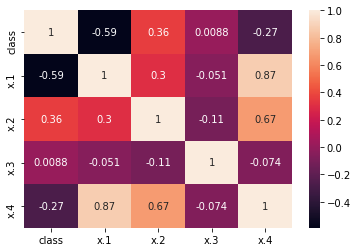

In [60]:
sns.heatmap(df.corr(), annot=True)

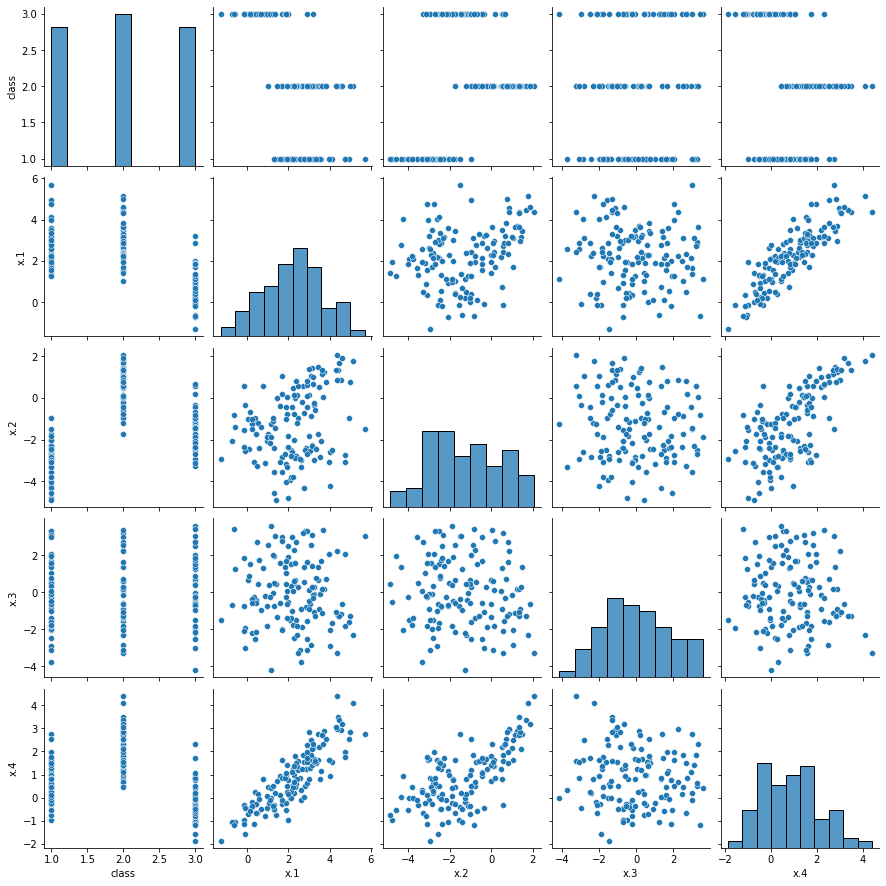

In [61]:
sns.pairplot(df)

In [62]:
Y = np.zeros((len(df),3))
for idx in df.index:
    Y[idx, df.loc[idx,'class']-1] = 1
Y_test = np.zeros((len(df_test),3))
for idx in df_test.index:
    Y_test[idx, df_test.loc[idx,'class']-1] = 1

In [63]:
X = df.iloc[:,1:].to_numpy()
X_test = df_test.iloc[:,1:].to_numpy()

In [64]:
X = np.concatenate((np.ones((len(df),1)), X), axis=1)
X_test = np.concatenate((np.ones((len(df_test),1)), X_test), axis=1)

In [65]:
w = np.linalg.inv(X.T@X)@X.T@Y

In [66]:
Y_hat = np.argmax(X@w,axis=1) + 1
np.mean(Y_hat == df['class'])

0.9264705882352942

In [67]:
Y_test_hat = np.argmax(X_test@w, axis=1) + 1
np.mean(Y_test_hat == df_test['class'])

0.8

In [68]:
from scipy.stats import mode

In [69]:
class K_NN:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X, self.y = X, y
    def predict(self, X : 'np.array', k) -> 'np.array':
        result = np.zeros((X.shape[0],1), dtype=int)
        #result = []
        index = 0
        for x in X:
            dist = np.sqrt(np.linalg.norm((self.X - x),ord=2,axis=1))
            #knn_indexes = np.argsort(dist)[1:k+1]
            knn_indexes = np.argpartition(dist,k+1)[1:k+1]
            knn = self.y[knn_indexes]
            result[index] = mode(knn)[0]
            #result.append(mode(knn)[0])
            index += 1
        return result

In [70]:
X, X_test = df[['x.1','x.2','x.3','x.4']].to_numpy(), df_test[['x.1','x.2','x.3','x.4']].to_numpy()
y = np.reshape(df['class'].to_numpy(), (len(df),1))
y_test = np.reshape(df_test['class'].to_numpy(), (len(df_test),1))
knn = K_NN()
knn.fit(X,y)
res_3 = knn.predict(X_test, 3)
res_5 = knn.predict(X_test, 5)

In [71]:
print('k=3',np.mean(res_3 == y_test))
print('k=5',np.mean(res_5 == y_test))

k=3 0.8
k=5 0.8


In [72]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [73]:
knn_3 = KNC(n_neighbors=3)
knn_3.fit(X,y)
res_3 = np.reshape(knn_3.predict(X_test),y_test.shape)

knn_5 = KNC(n_neighbors=5)
knn_5.fit(X,y)
res_5 = np.reshape(knn_5.predict(X_test), y_test.shape)

print('k=3:',np.mean(res_3 == y_test))
print('k=5:',np.mean(res_5 == y_test))
print('k3 vs k5:', np.mean(res_3 == res_5))

k=3: 0.8
k=5: 0.8
k3 vs k5: 1.0


/home/alexey/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


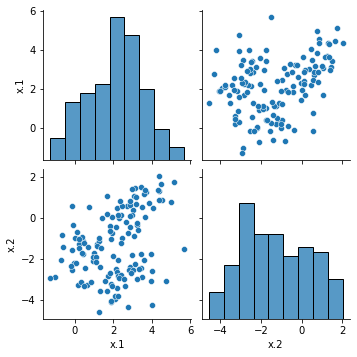

In [21]:
sns.pairplot(df[['x.1','x.2']])

In [22]:
from itertools import combinations

In [23]:
cols = [0,1,2]
combs = list(combinations(cols,2))

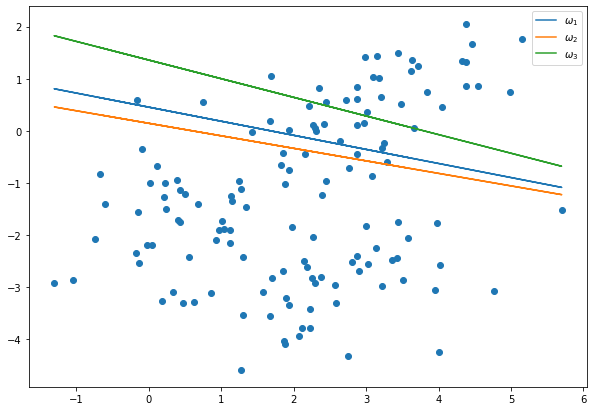

In [24]:
rcParams['figure.figsize'] = 10,7
X = np.concatenate([np.ones((len(df),1)),df[['x.1', 'x.2']].to_numpy()], axis=1)
Y = np.zeros((len(df),3))
for idx in df.index:
    Y[idx, df.loc[idx,'class']-1] = 1
w = np.linalg.inv(X.T@X)@X.T@Y
plt.scatter(x=df['x.1'], y=df['x.2'])
rcParams['figure.figsize'] = 10, 7
idx = 1
for i,j in combs:
    plt.plot(df['x.1'], (X[:,1]*(w[i,1] - w[j,1]) + w[i,0]-w[j,0])/(w[j,2]-w[i,2]), label=f'$\omega_{idx}$')
    plt.legend()
    idx += 1

## LDA & QDA

In [25]:
df.cov()

,class,x.1,x.2,x.3,x.4
class,0.657898,-0.666406,0.452016,-0.059212,-0.288280
x.1,-0.666406,2.085211,0.805358,-0.110463,1.631308
x.2,0.452016,0.805358,2.662984,-0.293179,1.414013
x.3,-0.059212,-0.110463,-0.293179,3.452260,-0.148140
x.4,-0.288280,1.631308,1.414013,-0.148140,1.623398


In [26]:
temp = df.groupby('class').mean().to_numpy()[1]
temp

array([ 3.09259916,  0.43282153, -0.29419253,  2.0619823 ])

In [27]:
temp = df.groupby('class').cov()

In [28]:
temp

x.1       x.2       x.3       x.4
class                                            
1     x.1  1.129247  0.386792 -0.064039  0.808253
      x.2  0.386792  0.548722  0.322108  0.412201
      x.3 -0.064039  0.322108  4.143955  0.049808
      x.4  0.808253  0.412201  0.049808  0.702642
2     x.1  0.863860  0.485546 -0.281259  0.731861
      x.2  0.485546  0.715674 -0.356878  0.616155
      x.3 -0.281259 -0.356878  3.053175 -0.318853
      x.4  0.731861  0.616155 -0.318853  0.788973
3     x.1  0.881758  0.307956  0.147267  0.713157
      x.2  0.307956  0.938867 -0.098430  0.476876
      x.3  0.147267 -0.098430  3.300363  0.157126
      x.4  0.713157  0.476876  0.157126  0.731130

In [29]:
class DiscrimantAnalysis:
    def __init__(self, K : 'num of classes', type_ : 'linear or quadratic'):
        self.K = K
        self.type = type_
    def fit(self, data):
        temp = df.groupby('class')
        self.p = np.reshape(df.groupby('class').count().to_numpy().mean(axis=1),(self.K,1))/len(df)
        self.mean = temp.mean().to_numpy()
        temp = temp.cov()
        self.sigma = [temp.loc[k].to_numpy() for k in range(1,self.K+1)]
        if self.type == 'linear':
            self.sigma = np.mean(self.sigma, axis=0)
        elif self.type == 'quadratic':
            pass
    def predict(self, X):
        delta = np.zeros((X.shape[0], self.K))
        for i in range(delta.shape[0]):
            for k in range(delta.shape[1]):
                x = np.reshape(X[i], (X.shape[1],1))
                mean_k = np.reshape(self.mean[k], (X.shape[1],1))
                sigma_k = self.sigma if self.type == 'linear' else self.sigma[k]
                delta[i,k] = -(np.log(np.linalg.det(sigma_k)) + (x-mean_k).T@np.linalg.inv(sigma_k)@(x-mean_k))/2 + np.log(self.p[k])
        return np.reshape(np.argmax(delta, axis=1) + 1,(X.shape[0],1))

In [30]:
X, X_test = df[['x.1','x.2','x.3','x.4']].to_numpy(), df_test[['x.1','x.2','x.3','x.4']].to_numpy()
y = np.reshape(df['class'].to_numpy(), (len(df),1))
y_test = np.reshape(df_test['class'].to_numpy(), (len(df_test),1))

lda = DiscrimantAnalysis(3,'linear')
lda.fit(df)
print('LDA:',np.mean(y_test == lda.predict(X_test)))

qda = DiscrimantAnalysis(3,'quadratic')
qda.fit(df)
print('QDA:',np.mean(y_test == qda.predict(X_test)))

LDA: 0.8
QDA: 0.8


In [31]:
np.mean(lda.predict(X_test) == qda.predict(X_test))

1.0

## SVM

In [32]:
from sklearn.svm import SVC

In [33]:
dff = pd.read_csv('var3.csv', sep=';')
dff['class'] = dff['class'].apply(lambda x : int(x))
for col in dff.columns[1:]:
    dff[col] = dff[col].apply(lambda x : float(x.replace(',','.')))
dff.drop(labels=dff[dff['class']==3].index, inplace=True)
test_indexes = np.random.randint(low=0, high=len(dff), size=15)
dff_test = dff.loc[test_indexes].copy()
dff.drop(labels=test_indexes, inplace=True)
dff.index = range(len(dff))
dff_test.index = range(len(df_test))

In [34]:
X = dff[['x.1','x.2','x.3','x.4']].to_numpy()
X -= X.mean(axis=0)
X_test = dff_test[['x.1','x.2','x.3','x.4']].to_numpy()
X_test -= X_test.mean(axis=0)
y = dff['class'].to_numpy()
y_test = dff_test['class'].to_numpy()

svm = SVC(C=1, kernel='linear')
svm.fit(X,y)
y_hat = svm.predict(X_test)
print('SVM linear:',np.mean(y_hat == y_test))

svm = SVC(C=1, kernel='rbf')
svm.fit(X,y)
y_hat = svm.predict(X_test)
print('SVM rbf:',np.mean(y_hat == y_test))

svm = SVC(C=1, kernel='sigmoid')
svm.fit(X,y)
y_hat = svm.predict(X_test)
print('SVM sigmoid:',np.mean(y_hat == y_test))

SVM linear: 1.0
SVM rbf: 0.9333333333333333
SVM sigmoid: 1.0


In [35]:
def cross_valid(data : 'pd.DataFrame', p) -> 'train_index, test_index':
    test_index = np.random.randint(low=0, high=len(data), size=int(p*len(data)))
    train_index = data.drop(labels=test_index).index
    return train_index, test_index

In [36]:
df = pd.read_csv('var3.csv', sep=';')
df['class'] = df['class'].apply(lambda x : int(x))
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x : float(x.replace(',','.')))

In [37]:
p, M = 0.2, 100
accuracy = {'LR' : [], 'kNN_3' : [],'kNN_5' : [], 'LDA' : [], 'QDA' : [], 'SVM' : []}
for m in range(M):
    train, test = cross_valid(df, p=p)
    X, X_test = df.iloc[train,1:].to_numpy(), df.iloc[test,1:].to_numpy()
    y, y_test = np.reshape(df.iloc[train,0].to_numpy(),(len(train),1)), np.reshape(df.iloc[test,0].to_numpy(),(len(test),1))
    
    # Linear Classificator
    
    X_lr = np.concatenate([np.ones((len(y),1)),X.copy()], axis=1)
    X_lr_test = np.concatenate([np.ones((len(y_test),1)),X_test.copy()], axis=1)
    Y = np.zeros((len(X),3))
    for i,j in enumerate(df.iloc[train].index):
        Y[i, df.iloc[j,0]-1] = 1
    Y_test = np.zeros((len(X_test),3))
    for i,j in enumerate(df.iloc[test].index):
        Y_test[i, df.iloc[j,0]-1] = 1
    w = np.linalg.inv(X_lr.T@X_lr)@X_lr.T@Y
    y_hat_test = np.argmax(X_lr_test@w, axis=1) + 1
    accuracy['LR'].append(np.mean(y_hat_test == df.loc[test,'class']))
    
    # kNN
    
    knn = K_NN()
    knn.fit(X,y)
    res_3 = knn.predict(X_test, 3)
    res_5 = knn.predict(X_test, 5)
    accuracy['kNN_3'].append(np.mean(res_3 == y_test))
    accuracy['kNN_5'].append(np.mean(res_5 == y_test))
    
    # Discriminant analysis
    
    LDA = DiscrimantAnalysis(K=3, type_='linear')
    LDA.fit(df.loc[train])
    y_hat_lda = LDA.predict(X_test)
    accuracy['LDA'].append(np.mean(y_hat_lda == y_test))
    
    QDA = DiscrimantAnalysis(K=3, type_='quadratic')
    QDA.fit(df.loc[train])
    y_hat_qda = QDA.predict(X_test)
    accuracy['QDA'].append(np.mean(y_hat_qda == y_test))
    
    # SVM
    
    dff = df.drop(labels=df[df['class']==3].index)
    train, test = cross_valid(dff, p=0.2)
    X = dff.iloc[train,1:].to_numpy()
    X_test = dff.iloc[test,1:].to_numpy()
    y = np.reshape(dff.iloc[train,0].to_numpy(), (len(X),1))
    y_test = np.reshape(dff.iloc[test,0].to_numpy(), (len(X_test),1))
    
    svm = SVC(kernel='rbf')
    X -= np.mean(X,axis=0)
    X_test -= np.mean(X_test,axis=0)
    svm.fit(X,y)
    y_hat_svm = np.reshape(svm.predict(X_test),(len(y_test),1))
    accuracy['SVM'].append(np.mean(y_hat_svm == y_test))
    

/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/alexey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [38]:
for key in accuracy:
    print(key, np.mean(accuracy[key]))

LR 0.8980000000000002
kNN_3 0.8776666666666668
kNN_5 0.8823333333333335
LDA 0.9163333333333336
QDA 0.9286666666666669
SVM 0.9640000000000002


## Feature selector


            if k == 0:
                x = np.ones((len(X),1))
            w = np.linalg.inv(x.T@x)@x.T@Y
            y = np.argmax(Y,axis=1) + 1
            y_hat = np.argmax(x@w, axis=1) + 1
            accuracy.append(np.mean(y==y_hat))
            

In [39]:
Y = np.zeros((len(df),3))
for idx in df.index:
    Y[idx, df.loc[idx,'class']-1] = 1
Y_test = np.zeros((len(df_test),3))
for idx in df_test.index:
    Y_test[idx, df_test.loc[idx,'class']-1] = 1


X = df.iloc[:,1:].to_numpy()
X_test = df_test.iloc[:,1:].to_numpy()

### Forward selection

In [40]:
def forward(X, Y, K):
    y = np.argmax(Y, axis=1) + 1
    X_new = np.ones((X.shape[0],1))
    #print(np.reshape(X[:,1],(len(Y),1)))
    new_features = []
    indexes = np.arange(X.shape[1])
    k = 0
    while k < K:
        accuracy = []
        for i in indexes:
            temp = np.concatenate([X_new,np.reshape(X[:,i],(len(Y),1))], axis=1)
            w = np.linalg.inv(temp.T@temp)@temp.T@Y
            y_hat = np.argmax(temp@w, axis=1) + 1
            accuracy.append(np.mean(y==y_hat))
        j = np.argmax(accuracy)
        X_new = np.concatenate([X_new,np.reshape(X[:,indexes[j]],(len(Y),1))], axis=1)
        new_features.append(indexes[j])
        indexes = np.delete(indexes,j)
        k += 1
    return X_new, new_features

In [41]:
X_new, new_features = forward(X,Y,K=2)
new_features

[1, 0]

In [42]:
y = np.reshape(np.argmax(Y,axis=1) + 1,(Y.shape[0],1))
print('4 features:',np.mean(np.reshape(np.argmax(X@np.linalg.inv(X.T@X)@X.T@Y,axis=1),(len(Y),1))+1 == y))
print('2 features:',np.mean(np.reshape(np.argmax(X_new@np.linalg.inv(X_new.T@X_new)@X_new.T@Y,axis=1),(len(Y),1))+1 == y))

4 features: 0.6866666666666666
2 features: 0.92


In [43]:
cols = [0,1,2]
combs = list(combinations(cols,2))

In [46]:
w

array([[-0.39401039,  0.44600583,  0.94800457],
       [-0.24914011,  0.19834817,  0.05079194],
       [ 0.17966663,  0.07320462, -0.25287125]])

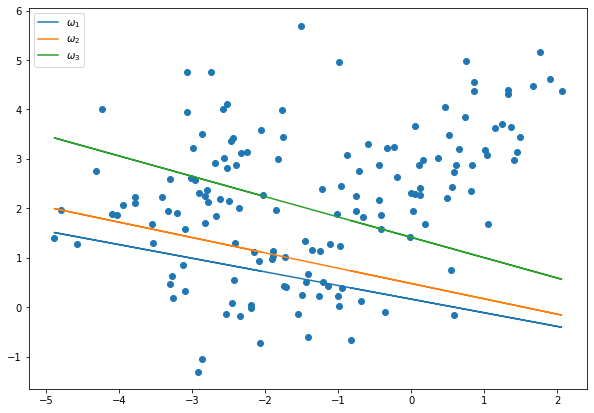

In [45]:
rcParams['figure.figsize'] = 10,7
#X = np.concatenate([np.ones((len(df),1)),df[['x.1', 'x.2']].to_numpy()], axis=1)
Y = np.zeros((len(df),3))
for idx in df.index:
    Y[idx, df.loc[idx,'class']-1] = 1
w = np.linalg.inv(X_new.T@X_new)@X_new.T@Y
plt.scatter(x=df['x.2'], y=df['x.1'])
rcParams['figure.figsize'] = 10, 7
idx = 1
for i,j in combs:
    plt.plot(df['x.2'], (X_new[:,1]*(w[i,1] - w[j,1]) + w[i,0]-w[j,0])/(w[j,2]-w[i,2]), label=f'$\omega_{idx}$')
    plt.legend()
    idx += 1

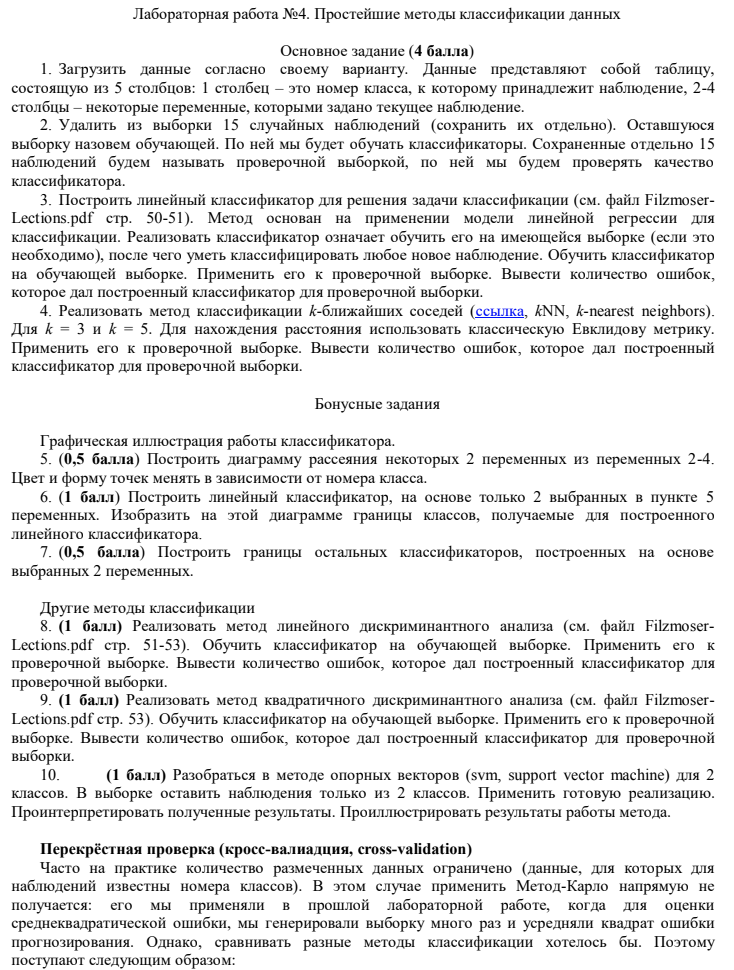

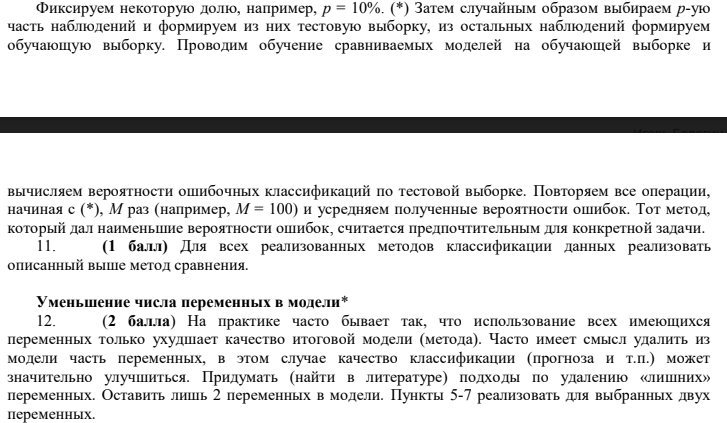

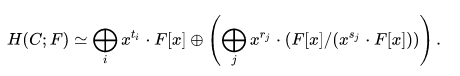